<a href="https://colab.research.google.com/github/Amrutha2122/MachineLearning/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Youtube adview Prediction

**Data Description**

The file train.csv contains metrics and other details of about 15000 youtube
videos. The metrics include number of views, likes, dislikes, comments and
apart from that published date, duration and category are also included.
The train.csv file also contains the metric number of adviews which is our
target variable for prediction.


**Attribute Information**

'vidid' : Unique Identification ID for each video

'adview' : The number of adviews for each video

'views' : The number of unique views for each video

'likes' : The number of likes for each video

'dislikes' : The number of likes for each video

'comment' : The number of unique comments for each video

'published' : The data of uploading the video

'duration' : The duration of the video (in min. and seconds)

'category' : Category niche of each of the video


***Objective***

To build a machine learning regression to predict youtube adview count based
on other youtube metrics.


# 1.Import the datasets and libraries, check shape and datatype

You basically import preinstalled python libraries or packages like numpy, pandas, matplotlib and
seaborn for data cleaning and visualisation. Scikitlearn and Keras are imported for machine learning
models and neural networks. Using the pandas library we can simply import the dataset in csv format
as a pandas dataframe. We can then explore the dataset and check the number of features and
samples in the data.

Import numpy, pandas, matplotlib and seaborn

Import dataset using pandas.csv() method

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# Importing data
path = "" # Put path of your folder of your data if it's not in the same folder
data_train = pd.read_csv(path + "train.csv")
data_train.head()
data_train.shape
# (14999, 9)


(14999, 9)

# 2.Visualise the dataset using plotting using heatmaps and plots.



Matplotlib and seaborn libraries can be used for plotting. We can plot for each of the features and
visually see the distribution of the data with respect to that feature. We can also use it to spot any
outliers whatsoever which will help our model to train and learn better. We can plot a heatmap using
the seaborn library where we can visualise the correlations of different features with respect to each
other. It helps to see how independent are the features because we may want to remove the features
which may not add any value to our model.

Plot distributions

Plot heatmap of correlation values

Remove outliers


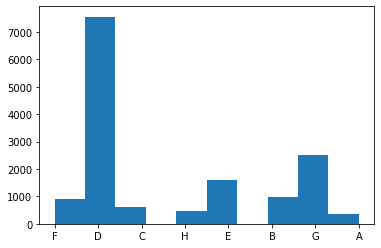

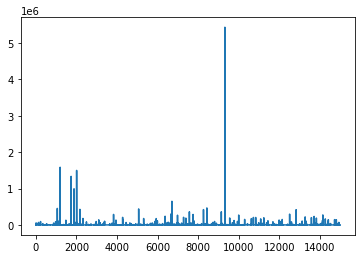

In [ ]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

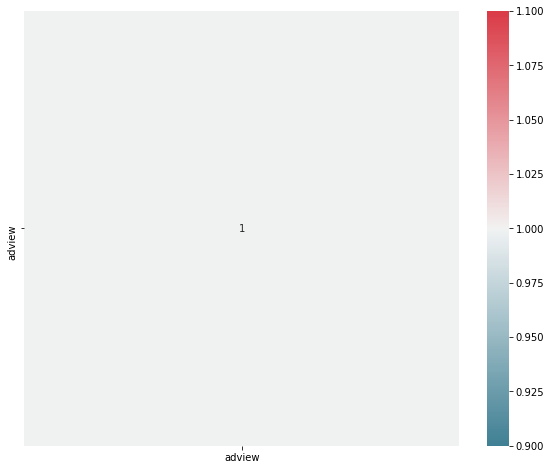

In [ ]:
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

# 3. Clean the dataset by removing missing values and other things.

Cleaning the dataset is one of the most essential tasks while solving a machine learning problem.
Here in this problem we can remove 'F' and other missing values that might hurt the performance of
our model.

Remove missing values

Remove any other unimportant feature or piece of data


In [ ]:
# Removing character "F" present in data

data_train=data_train[data_train.views!='F']

data_train=data_train[data_train.likes!='F']

data_train=data_train[data_train.dislikes!='F']

data_train=data_train[data_train.comment!='F']

data_train.head()

# Assigning each category a number for Category feature

category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}

data_train["category"]=data_train["category"].map(category)

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


# 4. Transform attributes into numerical values and other necessary transformations

Machine Learning models need data to be converted to numerical form at 
the end. We have
categorical data and data in other formats which may want to convert. 
We will use label encoder and
other date & time functions for that task. This part is quite open ended and also known as feature
engineering. You can transform original features into new ones which 
might give better results.

Convert categorical data using label encoder

Convert into numerical data

Feature selection



In [ ]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [ ]:
# Convert Time_in_sec for duration
import datetime
import time

In [ ]:
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
    if(h==''):
      h = '00'
    if(m == ''):
      m = '00'
    if(s==''):
      s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv(path + "train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,0,6
1,2741,2,1707,56,2,6,2185,0,4
2,8138,1,2023,25,0,2,2094,0,3
3,9004,6,620860,777,161,153,2119,0,8
4,122,1,666,1,0,0,2091,0,4


# 5. Normalise your data and split the data into training, validation and test set in the appropriate ratio.

We need to split the data into training and test data. We use training data to learn patterns in the
data and then check if it generalises well on unseen data. The split percentage can be varied and
is generally on the amount of data we have. For a relatively small dataset like this, the split
percentage should be high 8020 rather than 991 with respect to train:test).
Normalisation is done to ensure all the features all weighted appropriately in the training stage.
Just because some features have high scale should not translate to having higher influence on
the model. Normalisation can be done using Standard Scalar or MinMax Scalar among others. In
this particular problem, MinMax Scalar has been used which basically transforms each variable in
the range of 0 to 1.


Split dataset in train and test as well as into inputs and outputs

Normalise the dataset using scalars



In [ ]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()



,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,0,6
1,1707,56,2,6,2185,0,4
2,2023,25,0,2,2094,0,3
3,620860,777,161,153,2119,0,8
4,666,1,0,0,2091,0,4


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [ ]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

X_train.mean()

0.17037138915499772

# 6. Use linear regression, support vector regressor, random forest and for training and get errors.


Different machine learning models can be used for training out of which we can choose whichever gives the best
result. We will use the scikitlearn libraries for importing these models and the training them use the fit method and
providing necessary labelled data (input and output). We are optimising for mean square error here because it's a
regression problem after all. The metrics that we can use for us to compare different model can be mean square
error and mean absolute error.

Import scikitlearn library

Import the model and define

Use .fit method with data as arguments to train

Calculate errors



In [349]:
# Evaluation Metrics


# def print_error(X_test, y_test, model_name):
#   prediction = model_name.predict(X_test)
#   print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
#   print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
#   print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
  
#   print('prediction:',prediction)



**Linear Regression**

In [350]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [351]:
from sklearn import metrics
prediction = linear_regression.predict(X_test)
mae=metrics.mean_absolute_error(y_test, prediction)
mse=metrics.mean_squared_error(y_test, prediction)
rmse=np.sqrt(metrics.mean_squared_error(y_test, prediction))

print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)

print('prediction:',prediction)


Mean Absolute Error: 3719.581563422566
Mean Squared Error: 836136079.6417663
Root Mean Squared Error: 28916.017700260287
prediction: [[-1111.07405884]
 [ 2508.16109712]
 [  503.10061849]
 ...
 [-1023.21088414]
 [ 2841.67924511]
 [-1485.46235634]]


In [352]:
eval=[mae,mse,rmse]
df=pd.Series(eval,index=['mean_absolute_error','mean_squared_error','root_mean_squared_error'],name='Evaluation Results')
df

mean_absolute_error        3.719582e+03
mean_squared_error         8.361361e+08
root_mean_squared_error    2.891602e+04
Name: Evaluation Results, dtype: float64

**Support Vector Regressor**

In [353]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [354]:
from sklearn import metrics
prediction = supportvector_regressor.predict(X_test)
mae1=metrics.mean_absolute_error(y_test, prediction)
mse1=metrics.mean_squared_error(y_test, prediction)
rmse1=np.sqrt(metrics.mean_squared_error(y_test, prediction))

print('Mean Absolute Error:',mae1)
print('Mean Squared Error:',mse1)
print('Root Mean Squared Error:',rmse1)

print('prediction:',prediction)


Mean Absolute Error: 1696.9534032655565
Mean Squared Error: 833686060.8033673
Root Mean Squared Error: 28873.62223212334
prediction: [2.84062063 1.45286795 1.80996297 ... 2.36849372 1.70468909 2.38268219]


In [355]:
eval=[mae1,mse1,rmse1]
df=pd.Series(eval,index=['mean_absolute_error','mean_squared_error','root_mean_squared_error'],name='Evaluation Results')
df

mean_absolute_error        1.696953e+03
mean_squared_error         8.336861e+08
root_mean_squared_error    2.887362e+04
Name: Evaluation Results, dtype: float64

# 7. Use Decision Tree Regressor and Random Forest Regressors

Another class of machine learning algorithms include decision trees and random forests. We can import these
models from sklearn.tree and then again use the .fit function. We need to give appropriate hyper parameters for
them. These are something we can experiment with to achieve better results.
Import models

Assign hyperparameters for random forest

Train the models

Calculate error


**Decision Tree Regressor**

In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)


Mean Absolute Error: 2190.948087431694
Mean Squared Error: 471021186.14275956
Root Mean Squared Error: 21703.022511686235
prediction: [24.  1. 13. ...  2.  1. 77.]


In [ ]:
from sklearn import metrics
prediction = decision_tree.predict(X_test)
mae2=metrics.mean_absolute_error(y_test, prediction)
mse2=metrics.mean_squared_error(y_test, prediction)
rmse2=np.sqrt(metrics.mean_squared_error(y_test, prediction))

print('Mean Absolute Error:',mae2)
print('Mean Squared Error:',mse2)
print('Root Mean Squared Error:',rmse2)

print('prediction:',prediction)

Mean Absolute Error: 2190.948087431694
Mean Squared Error: 471021186.14275956
Root Mean Squared Error: 21703.022511686235
prediction: [24.  1. 13. ...  2.  1. 77.]


In [ ]:
eval=[mae2,mse2,rmse2]
df=pd.Series(eval,index=['mean_absolute_error','mean_squared_error','root_mean_squared_error'],name='Evaluation Results')
df

mean_absolute_error        2.190948e+03
mean_squared_error         4.710212e+08
root_mean_squared_error    2.170302e+04
Name: Evaluation Results, dtype: float64

**Random Forest Regressor**

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn import metrics
prediction = random_forest.predict(X_test)
mae3=metrics.mean_absolute_error(y_test, prediction)
mse3=metrics.mean_squared_error(y_test, prediction)
rmse3=np.sqrt(metrics.mean_squared_error(y_test, prediction))

print('Mean Absolute Error:',mae3)
print('Mean Squared Error:',mse3)
print('Root Mean Squared Error:',rmse3)

print('prediction:',prediction)

Mean Absolute Error: 3288.440229670318
Mean Squared Error: 443157517.40286237
Root Mean Squared Error: 21051.30678610861
prediction: [23.37058625  8.43719532 19.2963358  ...  4.54817926 50.56043171
 11.62728614]


In [ ]:
eval=[mae3,mse3,rmse3]
df=pd.Series(eval,index=['mean_absolute_error','mean_squared_error','root_mean_squared_error'],name='Evaluation Results')
df

mean_absolute_error        3.288440e+03
mean_squared_error         4.431575e+08
root_mean_squared_error    2.105131e+04
Name: Evaluation Results, dtype: float64

# 8. Build an artificial neural network and train it with different layers and hyperparameters. Experiment a little. Use keras.

At the end we can play around with neural networks using the keras library
which is quite similar to the scikit learn library. Here we can define the
model architecture (layers, number of neurons and activation functions),
optimisation algorithm (like gradient descent or adam), cost function (mean
square error) and give in the dataset. Then the model trains for different
epochs (going through dataset once means one epoch) to result in an
improved model. We may need to perform hyperparameter tuning (i.e.
selecting the best hyperparamters like number of neurons or activation
function to yield minimum error).
We need to accept the fact that in some cases neural network may not
perform better than other machine learning models.
Import keras

Define model architecture

Define optimisation algorithm and cost function

Train the neural network

Calculate errors

In [ ]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()


Epoch 1/100
366/366 [==============================] - 0s 877us/step - loss: 767402688.0000 - mean_squared_error: 767402688.0000
Epoch 2/100
366/366 [==============================] - 0s 853us/step - loss: 767391616.0000 - mean_squared_error: 767391616.0000
Epoch 3/100
366/366 [==============================] - 0s 839us/step - loss: 767372352.0000 - mean_squared_error: 767372352.0000
Epoch 4/100
366/366 [==============================] - 0s 878us/step - loss: 767329600.0000 - mean_squared_error: 767329600.0000
Epoch 5/100
366/366 [==============================] - 0s 826us/step - loss: 767254848.0000 - mean_squared_error: 767254848.0000
Epoch 6/100
366/366 [==============================] - 0s 815us/step - loss: 767146432.0000 - mean_squared_error: 767146432.0000
Epoch 7/100
366/366 [==============================] - 0s 852us/step - loss: 767002624.0000 - mean_squared_error: 767002624.0000
Epoch 8/100
366/366 [==============================] - 0s 849us/step - loss: 766843456.0000 - mea

In [ ]:
from sklearn import metrics
prediction = ann.predict(X_test)
mae4=metrics.mean_absolute_error(y_test, prediction)
mse4=metrics.mean_squared_error(y_test, prediction)
rmse4=np.sqrt(metrics.mean_squared_error(y_test, prediction))

print('Mean Absolute Error:',mae4)
print('Mean Squared Error:',mse4)
print('Root Mean Squared Error:',rmse4)

print('prediction:',prediction)

Mean Absolute Error: 3359.489118482246
Mean Squared Error: 830057519.7385877
Root Mean Squared Error: 28810.718834117757
prediction: [[1147.6296]
 [2147.4656]
 [1479.8044]
 ...
 [1342.5046]
 [2117.43  ]
 [1227.1719]]


In [ ]:
eval=[mae4,mse4,rmse4]
df=pd.Series(eval,index=['mean_absolute_error','mean_squared_error','root_mean_squared_error'],name='Evaluation Results')
df

mean_absolute_error        3.359489e+03
mean_squared_error         8.300575e+08
root_mean_squared_error    2.881072e+04
Name: Evaluation Results, dtype: float64

 # 9. Pick the best model based on error as well as generalisation.

 Now that we have different machine learning models and their respective
errors, we can select the one with minimum error or any other selection
scheme. It's important to make sure there is no overfitting and the model
generalises well. We use the test data we got from splitting the original
dataset (which acts as validation set in our case).

Compare errors for each model

Select the most suitable ones



**Making lists for performance analysis**

In [ ]:
mean_absolute=[mae,mae1,mae2,mae3,mae4]
root_mean_squared=[rmse,rmse1,rmse2,rmse3,rmse4]
print('mean_absolute_error:',mean_absolute)
print('root_mean-squared_error:',root_mean_squared)

mean_absolute_error: [3719.581563422566, 1696.9534032655565, 2190.948087431694, 3288.440229670318, 3359.489118482246]
root_mean-squared_error: [28916.017700260287, 28873.62223212334, 21703.022511686235, 21051.30678610861, 28810.718834117757]


**Comparing Algoritms using their mean_absolute_error root_mean_squared_error**

In [ ]:
dt=np.array([mean_absolute,root_mean_squared])
df=pd.DataFrame(dt,columns=['Linear Regression','Support Vector Regressor','Decision Tree','Random Forest','Artificial Neural Networks'],index=['mean_absolute','root_mean_squared'])
df

,Linear Regression,Support Vector Regressor,Decision Tree,Random Forest,Artificial Neural Networks
mean_absolute,3719.581563,1696.953403,2190.948087,3288.440230,3359.489118
root_mean_squared,28916.017700,28873.622232,21703.022512,21051.306786,28810.718834


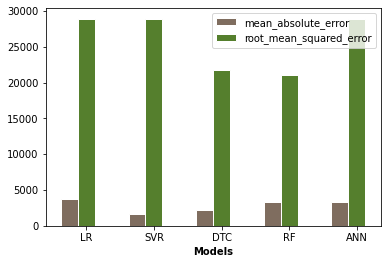

In [ ]:
barWidth = 0.25
models=['LR','SVR','DTC','RF','ANN']
r1 = np.arange(len(mean_absolute))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1,mean_absolute, color='#7f6d5f', width=barWidth, edgecolor='white', label='mean_absolute_error')
plt.bar(r2,root_mean_squared, color='#557f2d', width=barWidth, edgecolor='white', label='root_mean_squared_error')

 
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(mean_absolute))], models)
 
# Create legend & Show graphic
plt.legend()
plt.show()

# *From the above observations we can clearly said that Artificial Neural Networks and Decision Trees will give better predictions*

# 10. Save your model and predict on test set.

Saving the models can be done through both keras and scikitlearn. This
helps us to load the model again or share it with others. At the end, we use
completely unknown data from 'test.csv' to make our final predictions for
evaluation from our chosen model in the previous step.

Save models

Make predictions


In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
decision_tree.predict(X_test)


array([24.,  1., 13., ...,  2.,  1., 77.])

In [ ]:
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")
ann.predict(X_test)

array([[1147.6296],
       [2147.4656],
       [1479.8044],
       ...,
       [1342.5046],
       [2117.43  ],
       [1227.1719]], dtype=float32)